In [2]:
from pyscf import gto, scf, mp
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
data = np.load("data/md_h2.npz", allow_pickle=True)
R = data["R"][0]
mol_data = [[6, x.tolist()] for x in R]
mol_data
mol = gto.M()
mol.basis = "ccpvdz"
mol.unit = "B"
mol.atom = mol_data
mol.build()

In [4]:
hf = scf.RHF(mol)
hf_energy = hf.kernel(vebose=0)
mp2 = mp.MP2(hf)
mp2_energy = mp2.kernel()

converged SCF energy = -71.8885879692082
E(MP2) = -72.0596586858251  E_corr = -0.171070716616918
E(SCS-MP2) = -72.0574706025597  E_corr = -0.168882633351549


In [5]:
hf_1rdm = hf.make_rdm1()
mo_coeff = hf.mo_coeff
#hf_1rdm = np.einsum("ab,ia,jb->ij", hf_1rdm, mo_coeff, mo_coeff)
hf_2rdm = hf.make_rdm2()
hf_2rdm_dummy = (hf_1rdm[:, None, :, None] * hf_1rdm[None, :, None, :]) - (hf_1rdm[None, :, :, None] * hf_1rdm[:, None, None, :])
(np.einsum("aabc->", hf_2rdm_dummy))
np.einsum("aa->", hf_1rdm)

8.860062930342018

In [6]:
mp_1rdm = mp2.make_rdm1()
mp_2rdm = mp2.make_rdm2(ao_repr=True)
mp_1rdm = np.random.random((10, 10))
mp_2rdm_dummy = (mp_1rdm[:, None, :, None] * mp_1rdm[None, :, None, :]) - (mp_1rdm[None, :, :, None] * mp_1rdm[:, None, None, :])
mp_2rdm_dummy.sum()

-2.220446049250313e-15

In [7]:
rand = np.random.random((10, 10))
rand = (rand + rand.T) / 2

In [8]:
test = rand[:, None, :, None] * rand[None, :, None, :] - (rand[None, :, :, None] * rand[:, None, None, :])
test2 = np.zeros((10, 10, 10, 10))
for lambd in range(10):
    for sigma in range(10):
        for mu in range(10):
            for nu in range(10):
                test2[lambd, sigma, mu, nu] = rand[lambd, mu] * rand[sigma, nu] - rand[sigma, mu] * rand[lambd, nu]
test == test2

array([[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],

        [[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],

        [[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  T

In [9]:
test_reshaped = test.reshape((100, 100))

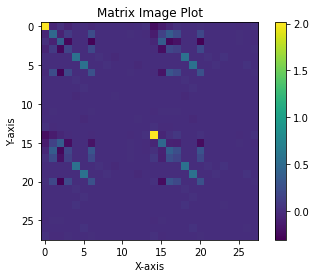

In [10]:
plt.imshow(hf_1rdm, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Add a colorbar to the plot
plt.title("Matrix Image Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


In [11]:
R = np.random.random((10, 3))
R = R[:, np.newaxis, :]
N = np.array([2 for _ in range(5)])
coords = np.random.random((5, 166, 3))
coords = np.repeat(coords, N, axis=0)
coords = np.transpose(coords, (0, -2, -1))
((R - coords) ** 2).sum(axis=-1) * np.random.random((3, 10, 166))

array([[[0.10924318, 0.13146893, 0.27988296, ..., 0.18601573,
         0.33225784, 0.29757953],
        [0.22949579, 0.32841315, 0.22533699, ..., 0.04487804,
         0.32867827, 0.22517691],
        [0.10776987, 0.11235248, 0.03587403, ..., 0.36598109,
         0.16294026, 0.23245022],
        ...,
        [0.05105164, 0.14881381, 0.53580504, ..., 0.04579688,
         0.01743802, 0.03780157],
        [0.34095447, 0.07771665, 0.01755279, ..., 0.40035403,
         0.59990331, 0.46635639],
        [0.14185248, 0.05707345, 0.31785358, ..., 0.12204529,
         0.07623404, 0.03172222]],

       [[0.02443113, 0.25430101, 0.49065288, ..., 0.12139897,
         0.39906402, 0.27534176],
        [0.32000318, 0.72151634, 0.63113957, ..., 0.13262265,
         0.20819201, 0.47248109],
        [0.09605137, 0.00490914, 0.07752114, ..., 0.29943203,
         0.32958205, 0.33631841],
        ...,
        [0.09125393, 0.13104361, 0.28841428, ..., 0.11070357,
         0.00155936, 0.12432993],
        [0.4

In [14]:
test1 = np.ones((1, 200, 3))
test2 = np.ones((3, 1, 1))
(test1 * test2).shape

(3, 200, 3)